In [ ]:
!pip install pymerkle


  Attempting uninstall: cachetools
    Found existing installation: cachetools 5.3.3
    Uninstalling cachetools-5.3.3:
      Successfully uninstalled cachetools-5.3.3


In [ ]:
import hashlib
import datetime
import time
import matplotlib.pyplot as plt

class Block:
   def __init__(self, data, previous_hash=None):
       self.timestamp = datetime.datetime.now()
       self.data = data
       self.previous_hash = previous_hash
       self.hash = self.calculate_hash()

   def calculate_hash(self):
       sha = hashlib.sha256()
       sha.update(str(self.timestamp).encode('utf-8') +
                  str(self.data).encode('utf-8') +
                  str(self.previous_hash).encode('utf-8'))
       return sha.hexdigest()

class Blockchain:
   def __init__(self):
       self.chain = [self.create_genesis_block()]


   def create_genesis_block(self):
       return Block("Genesis Block", "0")


   def add_block(self, data, difficulty):
       start_time = time.time()
       previous_hash = self.chain[-1].hash
       new_block = Block(data, previous_hash)
       new_block = self.proof_of_work(new_block, difficulty)
       self.chain.append(new_block)
       end_time = time.time()
       time_taken = end_time - start_time
       print(f"Block mined in {time_taken:.4f} seconds with difficulty level {difficulty}")
       return time_taken


   def proof_of_work(self, block, difficulty):
       prefix_zeros = '0' * difficulty
       while True:
           if block.hash[:difficulty] == prefix_zeros:
               return block
           else:
               block.timestamp = datetime.datetime.now()
               block.hash = block.calculate_hash()


   def print_last_block(self):
       last_block = self.chain[-1]
       print("Last Block:")
       print("Timestamp:", last_block.timestamp)
       print("Data:", last_block.data)
       print("Previous Hash:", last_block.previous_hash)
       print("Hash:", last_block.hash)


# Test the blockchain
blockchain = Blockchain()
data = "Block A Data"


difficulty_levels = range(8)
times = []


for difficulty in difficulty_levels:
   time_taken = blockchain.add_block(data, difficulty)
   times.append(time_taken)

Block mined in 0.0000 seconds with difficulty level 0
Block mined in 0.0002 seconds with difficulty level 1
Block mined in 0.0038 seconds with difficulty level 2
Block mined in 0.0098 seconds with difficulty level 3
Block mined in 0.3602 seconds with difficulty level 4
Block mined in 14.1644 seconds with difficulty level 5
Block mined in 144.2386 seconds with difficulty level 6


In [ ]:
plt.plot(difficulty_levels, times, marker='o')
plt.title("Difficulty vs. Time")
plt.xlabel("Difficulty Level")
plt.ylabel("Time Taken (seconds)")
plt.xticks(difficulty_levels)
plt.grid(True)
plt.show()

In [ ]:
pip install pymerkle
from pymerkle import *
tree=MerkleTree()

In [ ]:
with open('current_state', 'w') as f:
    f.write(tree.__repr__())

In [ ]:
tree.export('backup.json')

In [ ]:
loaded_tree = MerkleTree.loadFromFile('backup.json')

from pymerkle import InmemoryTree as MerkleTree
tree = MerkleTree(algorithm="sha256")
for i in range(1, 11):
  tree.append_entry(bytes(("Transaction "+str(i)).encode()))
size = tree.get_size()
print("Tree size: ", size)
print(tree)

In [ ]:
# Task 1: Perform cryptographic hash functions md5 and SHA

import hashlib

# MD5
message = "Adwait studies in SPIT"
md5_hash = hashlib.md5(message.encode()).hexdigest()
print("MD5 hash of '{}': {}".format(message, md5_hash))

# SHA-256
sha256_hash = hashlib.sha256(message.encode()).hexdigest()
print("SHA-256 hash of '{}': {}".format(message, sha256_hash))



MD5 hash of 'Adwait studies in SPIT': 0390e2caf223ec1c2d096ba6f4625925
SHA-256 hash of 'Adwait studies in SPIT': a41d6a433e92921f5a22efdfb471548fb70fc18132f5624c1d0652edc3488b78


In [ ]:
# Task 2: Demonstrate properties of cryptographic hash functions

# Collision resistance
message1 = "I am Adwait"
message2 = "Who are you"  # Different message
sha256_hash1 = hashlib.sha256(message1.encode()).hexdigest()
sha256_hash2 = hashlib.sha256(message2.encode()).hexdigest()
print("\nCollision resistance:")
print("Hash of '{}': {}".format(message1, sha256_hash1))
print("Hash of '{}': {}".format(message2, sha256_hash2))

# Preimage resistance
target_hash = "e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b934ca495991b7852b855"
try:
    preimage = hashlib.sha256(b"").hexdigest()
    if preimage == target_hash:
        print("\nPreimage found for '{}': {}".format(target_hash, preimage))
    else:
        print("\nNo preimage found for '{}'".format(target_hash))
except:
    print("\nError occurred while finding preimage")




Collision resistance:
Hash of 'I am Adwait': 9d588e2269812ba6071cd9d09af3bf18af47cb9b3721e69fd36b66efa8d5afc6
Hash of 'Who are you': cda67fda126b21c0ec146b48ecf36e7d4d63a19c6bfea63180bb95c713105ab6

Preimage found for 'e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b934ca495991b7852b855': e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b934ca495991b7852b855


In [ ]:
# Task 3: Use pymerkle library to compute hash of transactions

from pymerkle import InmemoryTree as MerkleTree

tree = MerkleTree(algorithm="sha256")

for i in range(1, 11):
    tree.append_entry(bytes(("Transaction " + str(i)).encode()))

size = tree.get_size()
print("\nTree size: ", size)
print(tree)




Tree size:  10


 └─a36453ab...
    ├──20800467...
    │   ├──0ce72ddb...
    │   │   ├──3bf08fe8...
    │   │   │   ├──8aeac43a...
    │   │   │   └──379f886c...
    │   │   └──52b7009a...
    │   │       ├──8b57e888...
    │   │       └──fcb7c9ab...
    │   └──afcedaba...
    │       ├──4403e2a2...
    │       │   ├──c542d24e...
    │       │   └──6cee2862...
    │       └──fc7f7935...
    │           ├──d5ffab37...
    │           └──93dbd74a...
    └──5f9ca73c...
        ├──dbba524f...
        └──9ceda457...




Block mined in 0.0000 seconds with difficulty level 0
Block mined in 0.0001 seconds with difficulty level 1
Block mined in 0.0008 seconds with difficulty level 2
Block mined in 0.0029 seconds with difficulty level 3
Block mined in 0.1944 seconds with difficulty level 4
Block mined in 5.7005 seconds with difficulty level 5
Block mined in 5.3402 seconds with difficulty level 6
Block mined in 3175.2366 seconds with difficulty level 7


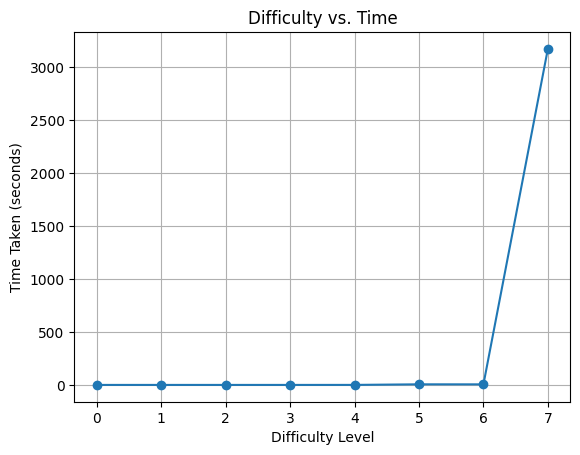


Computing root hash for 11 transactions...
Root hash (merkle root) for 11 transactions: <pymerkle.concrete.inmemory.Node object at 0x7b24dd397e00>


In [ ]:
# Task 4: Compute the root hash (merkle root) for 11 transactions

import datetime
import hashlib
import time

class Block:
    def __init__(self, data, previous_hash=None):
        self.timestamp = datetime.datetime.now()
        self.data = data
        self.previous_hash = previous_hash
        self.hash = self.calculate_hash()

    def calculate_hash(self):
        sha = hashlib.sha256()
        sha.update(str(self.timestamp).encode('utf-8') +
                   str(self.data).encode('utf-8') +
                   str(self.previous_hash).encode('utf-8'))
        return sha.hexdigest()

class Blockchain:
    def __init__(self):
        self.chain = [self.create_genesis_block()]

    def create_genesis_block(self):
        return Block("Genesis Block", "0")

    def add_block(self, data, difficulty):
        start_time = time.time()
        previous_hash = self.chain[-1].hash
        new_block = Block(data, previous_hash)
        new_block = self.proof_of_work(new_block, difficulty)
        self.chain.append(new_block)
        end_time = time.time()
        time_taken = end_time - start_time
        print(f"Block mined in {time_taken:.4f} seconds with difficulty level {difficulty}")
        return time_taken

    def proof_of_work(self, block, difficulty):
        prefix_zeros = '0' * difficulty
        while True:
            if block.hash[:difficulty] == prefix_zeros:
                return block
            else:
                block.timestamp = datetime.datetime.now()
                block.hash = block.calculate_hash()

    def print_last_block(self):
        last_block = self.chain[-1]
        print("Last Block:")
        print("Timestamp:", last_block.timestamp)
        print("Data:", last_block.data)
        print("Previous Hash:", last_block.previous_hash)
        print("Hash:", last_block.hash)

blockchain = Blockchain()
data = "Block A Data"
difficulty_levels = range(8)
times = []

for difficulty in difficulty_levels:
    time_taken = blockchain.add_block(data, difficulty)
    times.append(time_taken)

import matplotlib.pyplot as plt

plt.plot(difficulty_levels, times, marker='o')
plt.title("Difficulty vs. Time")
plt.xlabel("Difficulty Level")
plt.ylabel("Time Taken (seconds)")
plt.xticks(difficulty_levels)
plt.grid(True)
plt.show()

In [ ]:
# Compute root hash (merkle root) for 11 transactions
# print("\nComputing root hash for 11 transactions...")
# merkle_tree = MerkleTree(algorithm="sha256")
# for i in range(1, 12):
#     merkle_tree.append_entry(bytes(("Transaction " + str(i)).encode()))
# root_hash = merkle_tree.root
# print("Root hash (merkle root) for 11 transactions:", root_hash)